In [14]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


### 1. Data reading

### Read one-tile/one-month ATL06 data

In [33]:
with h5py.File('data/icesat/ATL06-readout/2020/tile-27-91-month/ATL06_2020.h5','r') as f_atl06_tile:
    atl06_time_tile_2020 = f_atl06_tile['t_dyr'][:]
    idx_one_month = np.where((atl06_time_tile_2020<2020.0833))[0]    ## date -> 202001
    atl06_lat_tile_month  = f_atl06_tile['h_lat'][:][idx_one_month]
    atl06_lon_tile_month  = f_atl06_tile['h_lon'][:][idx_one_month]
    atl06_h_tile_month = f_atl06_tile['h_li'][:][idx_one_month]
    atl06_beam_tile_month = f_atl06_tile['beam_type'][:][idx_one_month]
    atl06_spot_tile_month = f_atl06_tile['spot'][:][idx_one_month]    # 1->strong; 0->weak
    atl06_rgt_tile_month = f_atl06_tile['rgt'][:][idx_one_month]    # 1->strong; 0->weak
    print(f_atl06_tile.keys())



<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


### Read one-tile/one-month atl03 data

In [35]:
with h5py.File('data/icesat/ATL03-readout/2020/tile-27-91-month/ATL03_2020.h5','r') as f_atl03_tile:
    atl03_lat_tile_month  = f_atl03_tile['h_lat'][:]
    atl03_lon_tile_month  = f_atl03_tile['h_lon'][:]
    atl03_h_tile_month = f_atl03_tile['h_li'][:]
    atl03_time_tile_month = f_atl03_tile['t_dyr'][:]
    atl03_beam_tile_month = f_atl03_tile['beam_type'][:]    # 1->strong; 0->weak
    atl03_spot_tile_month = f_atl03_tile['spot'][:]    # 1->strong; 0->weak
    atl03_rgt_tile_month = f_atl03_tile['rgt'][:]    # 1->strong; 0->weak
    print(f_atl03_tile.keys())


<KeysViewHDF5 ['beam_type', 'cycle', 'h_lat', 'h_li', 'h_lon', 'orbit_type', 'rgt', 'spot', 't_dyr']>


### 2. Visualize the tracks of ATL03 and ATL06 data, respectively. 

In [40]:
# atl03_rgt_tile_month[2000000:]
np.unique(atl03_rgt_tile_month)

array([172., 233., 439., 500.], dtype=float32)

Text(0.5, 1.0, 'ATL03-spot (spot=5, One month)')

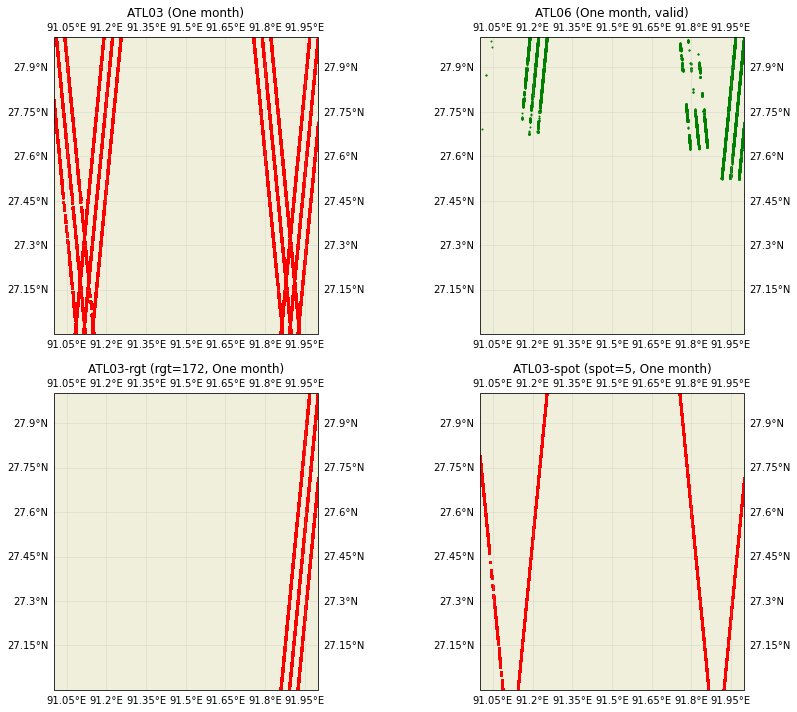

In [45]:
## Visualize the one-month atl03 data
idx_atl03_rgt = np.where((atl03_rgt_tile_month == 172))[0]  # specific reference ground track
idx_atl03_spot = np.where((atl03_spot_tile_month == 5))[0]  # specific spot
fig = plt.figure(figsize=(14, 12))

ax_1 = fig.add_subplot(2, 2, 1, projection=ccrs.Mercator())
ax_1.set_extent([91, 92, 27, 28])
ax_1.add_feature(cfeature.LAND); 
ax_1.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_1.scatter(x=atl03_lon_tile_month, y=atl03_lat_tile_month, color='red', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL03 (One month)')

ax_2 = fig.add_subplot(2, 2, 2, projection=ccrs.Mercator())
ax_2.set_extent([91, 92, 27, 28])
ax_2.add_feature(cfeature.LAND);
ax_2.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_2.scatter(x=atl06_lon_tile_month, y=atl06_lat_tile_month, \
                                          color='green', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL06 (One month, valid)')

ax_3 = fig.add_subplot(2, 2, 3, projection=ccrs.Mercator())
ax_3.set_extent([91, 92, 27, 28])
ax_3.add_feature(cfeature.LAND);
ax_3.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_3.scatter(x=atl03_lon_tile_month[idx_atl03_rgt], y=atl03_lat_tile_month[idx_atl03_rgt], \
                                    color='red', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL03-rgt (rgt=172, One month)')

ax_4 = fig.add_subplot(2, 2, 4, projection=ccrs.Mercator())
ax_4.set_extent([91, 92, 27, 28])
ax_4.add_feature(cfeature.LAND);
ax_4.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax_4.scatter(x=atl03_lon_tile_month[idx_atl03_spot], y=atl03_lat_tile_month[idx_atl03_spot], \
                                    color='red', s=1, transform=ccrs.PlateCarree(), zorder=0)
plt.title('ATL03-spot (spot=5, One month)')



### 3. Compare the weak beam and strong beam.

Text(0.5, 1.0, 'atl06 weak beam (red) and strong beam (green) tracks')

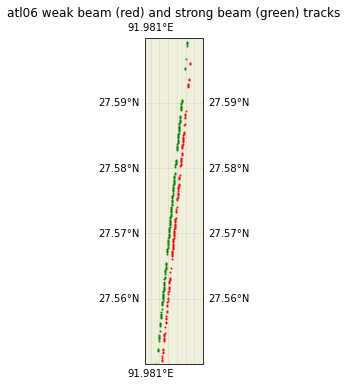

In [59]:
#### Weak-beam track vs. Strong-beam track
#### specific rgt, spot, and beam_type.
idx_atl06_w = np.where((atl06_rgt_tile_month == 172) & (atl06_spot_tile_month >= 5) & (atl06_beam_tile_month == 0))[0]  # weak beam (left beam)
idx_atl06_s = np.where((atl06_rgt_tile_month == 172) & (atl06_spot_tile_month >= 5) & (atl06_beam_tile_month == 1))[0]  # strong beam (left beam)

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91.98, 91.99, 27.55, 27.6])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)
ax.scatter(x=atl06_lon_tile_month[idx_atl06_w], y=atl06_lat_tile_month[idx_atl06_w], \
                            c='r', vmax=7000, vmin=4000, s=1, transform=ccrs.PlateCarree(), zorder=0)
ax.scatter(x=atl06_lon_tile_month[idx_atl06_s], y=atl06_lat_tile_month[idx_atl06_s], \
                            c='g', vmax=7000, vmin=4000, s=1, transform=ccrs.PlateCarree(),zorder=0)
plt.title('atl06 weak beam (red) and strong beam (green) tracks')



### 4. Compare the weak beams of atl03 and atl06, and the strong beams of atl03 and atl06, respectively.

Text(0.5, 1.0, 'ATL03-ATL06/strong beam (local)')

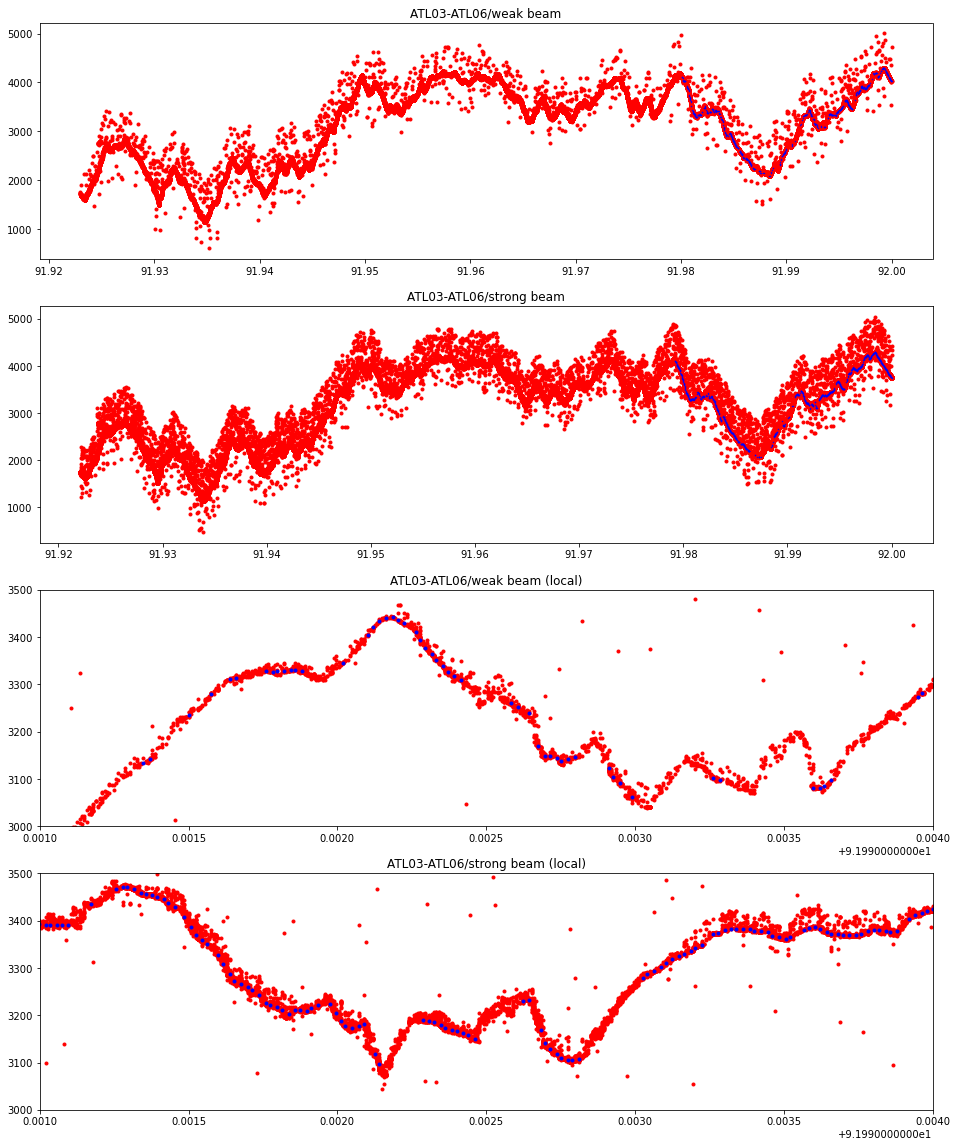

In [78]:
idx_atl03_w = np.where((atl03_rgt_tile_month == 172) & (atl03_spot_tile_month >= 5) & (atl03_beam_tile_month == 0))[0]  # weak beam (left beam)
idx_atl03_s = np.where((atl03_rgt_tile_month == 172) & (atl03_spot_tile_month >= 5) & (atl03_beam_tile_month == 1))[0]  # strong beam (left beam)

plt.figure(figsize=(16, 20))
# ### weak beam
plt.subplot(4,1,1)
plt.plot(atl03_lon_tile_month[idx_atl03_w], atl03_h_tile_month[idx_atl03_w], 'r.')
plt.plot(atl06_lon_tile_month[idx_atl06_w], atl06_h_tile_month[idx_atl06_w], 'b.', markersize=1)
plt.title('ATL03-ATL06/weak beam')

### strong beam
plt.subplot(4,1,2)
plt.plot(atl03_lon_tile_month[idx_atl03_s], atl03_h_tile_month[idx_atl03_s], 'r.')
plt.plot(atl06_lon_tile_month[idx_atl06_s], atl06_h_tile_month[idx_atl06_s], 'b.',markersize=1)
plt.title('ATL03-ATL06/strong beam')

# #### Sub_region
### Weak beam
plt.subplot(4,1,3)
plt.plot(atl03_lon_tile_month[idx_atl03_w], atl03_h_tile_month[idx_atl03_w], 'r.')
plt.plot(atl06_lon_tile_month[idx_atl06_w], atl06_h_tile_month[idx_atl06_w], 'b.')
plt.xlim(91.991, 91.994)
plt.ylim(3000, 3500)
plt.title('ATL03-ATL06/weak beam (local)')
### Strong beam
plt.subplot(4,1,4)
plt.plot(atl03_lon_tile_month[idx_atl03_s], atl03_h_tile_month[idx_atl03_s], 'r.')
plt.plot(atl06_lon_tile_month[idx_atl06_s], atl06_h_tile_month[idx_atl06_s], 'b.')
plt.xlim(91.991, 91.994)
plt.ylim(3000, 3500)
plt.title('ATL03-ATL06/strong beam (local)')

